06 May 2023 from Matthew: I was able to identify some pretty interesting articles discussing the relationship between air quality and demography in Los Angeles and cities around the world at large. The phrases I searched for were of the for "air quality and demographics in Los Angeles" in Google Scholar. There may be other interesting keywords we would want to search for in the future, so let's be sure to stay open to reviewing further literature if need be.

## Article 1

The first interesting article I found was:

[Jerrett, Michael, Richard T. Burnett, Renjun Ma, C. Arden Pope III, Daniel Krewski, K. Bruce Newbold, George Thurston et al. "Spatial analysis of air pollution and mortality in Los Angeles." Epidemiology (2005): 727-736.](https://www.jstor.org/stable/20486136?casa_token=zwJo2wLvcnMAAAAA%3Aruo-xejz_HU9HgnZF2ADcoi8tjCE74o_GHnfksM_bqk-RvLCWtVq8LEPt7xFJZS7ruWKELoFQiZ-kPv4z7eIxV_sJjIb5A-2BIGnFt_M_cS3yDVElUOj)

This article introduced me to the idea that **PM$_{2.5}$** and **O$_3$** levels might be a good way to measure air quality. Of course, we might also simply want to use the Air Quality Index (AQI) if that is available to us in through the EPA AQS API. Can we see if we can extract data on PM$_{2.5}$ and O$_3$ levels in Los Angeles through the EPA AQS API?

In [2]:
#see if we can import the data on PM2.5 and O3 levels here. Can we get AQI directly from the API?

### Issue with Air Quality Data

In our meeting on 08 May 2023, we noticed that there might not be enough weather stations provided in the AQS API. Apple Maps seems to provide much more air quality information than what we have see so far on the AQS API. Apple Maps says on their website that they get their air quality data from **BreezoMeter** and **QWeather**. It looks like [AirNow API](https://docs.airnowapi.org/webservices) gives us data on fine particulate matter, ozone, and AQI by ZIP code!

## Article 2

Another interesting piece I found was:

Lisa Schweitzer & Jiangping Zhou (2010) Neighborhood Air Quality, Respiratory Health, and Vulnerable Populations in Compact and Sprawled Regions, Journal of the American Planning Association, 76:3, 363-371, DOI: [10.1080/01944363.2010.486623](https://doi.org/10.1080/01944363.2010.486623)

I quote the main interesting finding from the abstract: "Exposures to both ozone and fine particulates are also higher in neighborhoods with high proportions of African Americans, Asian ethnic minorities, and poor households."

In essence, it may be a good idea to explore how air quality varies with **racial/ethnic composition** and **income** throughout Los Angeles. I should note here that the article aggregates findings from 80 different U.S. cities (i.e. this study does not focus on Los Angeles). However, it still gives us a lead as to which demographic characteristics of LA residents might vary with air quality.

Can we see what racial/ethnic and income information we can get from the U.S. Census? I will note that Louise provided a great PDF guide on how to access data from the Census API, so we should definitely look into that while we try to query data from there.

In [ ]:
#this is an example query from the U.S. census data.
#here, we get population estimates by state in the year 2019. The formatting for the URL can be found in the 
    #pdf guide that Louise provided.
#remaining question: is there a way to gather data using this url format for many years? What are the different
    #types of localities we can query data for?

In [34]:
import pandas as pd
import numpy as np

In [12]:
test = pd.read_json("https://api.census.gov/data/2019/pep/charagegroups?get=NAME,POP&HISP=2&for=state:*")

In [5]:
test

,0,1,2,3
0,NAME,POP,HISP,state
1,Mississippi,100110,2,28
2,Missouri,268708,2,29
3,Montana,43289,2,30
4,Nebraska,219645,2,31
5,Nevada,900600,2,32
6,New Hampshire,54589,2,33
7,New Jersey,1856844,2,34
8,New Mexico,1032942,2,35
9,New York,3751058,2,36


Let's take a closer look at the query url. To obtain the above data, we ran the code

`pd.read_json("https://api.census.gov/data/2019/pep/charagegroups?get=NAME,POP&HISP=2&for=state:*")`

Focus on the bold sections of the url.

### Year

api.census.gov/data/**2019**/pep/charagegroups?get=NAME,POP&HISP=2&for=state:*

According to an example in the manual, we can replace this with `timeseries` to get data across multiple years. This only works with time series datasets, so we will have to replace the data set name as shown below.

### Data set

api.census.gov/data/2019/**pep**/charagegroups?get=NAME,POP&HISP=2&for=state:*

To get data from the American Community Survey (ACS), we can replace this section. In some examples in the manual, they replaced this with /acs/acs1.

[Here](https://api.census.gov/data.html) is a list of different Census data sets.

### Querying Data

Let's see if we can import data on racial/ethnic composition and income in LA from the U.S. Census API.

In [11]:
# Specify your API key.
# This is not actually necessary to query the necessary data.
api_key = "YOUR_API_KEY_HERE"

# Specify the variables of interest
variables = "B03002_001E,B03002_003E,B03002_004E,B03002_012E,B19013_001E"

# Specify the geography of interest (Los Angeles County, California)
state = "06"
county = "037"
place = "*" # Wildcard to include all places within the county
tract = "*" # Wildcard to include all tracts within the place

# Build the API URL with API key
#url = f"https://api.census.gov/data/2019/acs/acs5/?get={variables}&for=tract:{tract}&in=place:{place}&in=county:{county}&in=state:{state}&key={api_key}"

#Without API key:
url = f"https://api.census.gov/data/2019/acs/acs5?get={variables}&for=tract:{tract}&in=place:{place}&in=county:{county}&in=state:{state}"

data = pd.read_json(url)

HTTPError: HTTP Error 400: 

The above code does not seem to work yet. If you copy and paste the url to a browser, it says `error: unknown/unsupported geography heirarchy`. We can probably change tract, place, county, etc. to avert this issue. The following url seems to work, though. It feels like we are really close to querying the data we want.

Note about the variable codes: we have the total population (`B03002_001E`), the population that identifies as White alone (`B03002_003E`), the population that identifies as Black or African American alone (`B03002_004E`), the population that identifies as Hispanic or Latino (`B03002_012E`), and the median household income (`B19013_001E`).

Note also that we use the acs5 data set here. Information on when to use the ACS 1-year, 3-year, and 5-year estimates can be found [here](https://www.census.gov/programs-surveys/acs/guidance/estimates.html). The website says that 5-year estimates are the most accurate, yet the least current. In addition, the sample size is reduced when you move from 5-year to 3-year and 3-year to 1-year data. Because we are not necessarily interested in how current the data is, we choose the most accurate data (5-year).

In [ ]:
#this is just a test case.
https://api.census.gov/data/2019/acs/acs5?get=B03002_001E&for=state:*

In [ ]:
#this is the ideal type of query we want, but the geographic hierarchy doesn't work.
#note that this only contains one of our variables of interest.
https://api.census.gov/data/2019/acs/acs5?get=B03002_001E&for=zip%20code%20tabulation%20area:*&in=state:06&in=county:037

In [10]:
#this is the closest query we have achieved to the data we want. how do we refine the geographic hierarchy?
https://api.census.gov/data/2019/acs/acs5?get=B03002_001E,B03002_003E,B03002_004E,B03002_012E,B19013_001E&for=zip%20code%20tabulation%20area:*&in=state:06

The second-to-last line (including county code 037, which is Los Angeles County) is the ideal query, but the geographic heirarchy is not recongnized by the Census API. However, the last line (excluding county code) works. In effect, we know that we can query data by ZIP code across the whole state of California (state code 06).

Because we have data for all of the ZIP codes in California, we can simply find a list of all ZIP codes in Los Angeles County and use vectorized operations to extract the relevant LA County data from the query.

Note that we can find geographic hierarcy information on the website for any dataset we want to use. [Here](https://api.census.gov/data/2021/acs/acs5/geography.html) is an example of the hierarchy for ACS5.

### Using Web Scraping to Obtain LA ZIP Codes

In [101]:
#I'm going to try to implement web scraping to obtain the ZIP codes.

data = pd.read_html("https://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?FIPS=06037")

In [102]:
#quickly exploring the data, we notice that we can extract the necessary data from the website from the
    #'Zip Code' column in data[2] through data[14]. For example,
data[2]

,Zip Code,City,County
0,90001,Firestone Park,Los Angeles County
1,90001,Los Angeles,Los Angeles County
2,90002,Los Angeles,Los Angeles County
3,90002,August F. Haw,Los Angeles County
4,90003,Los Angeles,Los Angeles County
5,90004,Los Angeles,Los Angeles County
6,90004,Oakwood,Los Angeles County
7,90005,Sanford,Los Angeles County
8,90005,Los Angeles,Los Angeles County
9,90006,Los Angeles,Los Angeles County


In [71]:
#we will just loop over these data frames to get what we need.

zip_codes = []

for i in range(2, 15):
    zip_codes.append(data[i]["Zip Code"].tolist())

#here, we have a list of lists of zip codes. we make this a single list of zip codes by applying the following code.
zip_codes = [item for sublist in zip_codes for item in sublist]

#this gives us the list of ZIP codes we want.

### Combining Scraped ZIP Codes and Census API to Make Final Census Data Set for 2019

In [109]:
#reading in the census data
data = pd.read_json("https://api.census.gov/data/2018/acs/acs5?get=B03002_001E,B03002_003E,B03002_004E,B03002_012E,B19013_001E&for=zip%20code%20tabulation%20area:*&in=state:06")

data

,0,1,2,3,4,5,6
0,B03002_001E,B03002_003E,B03002_004E,B03002_012E,B19013_001E,state,zip code tabulation area
1,1328,1288,1,26,61900,06,96008
2,145,120,0,7,34762,06,96014
3,375,352,0,8,94398,06,96016
4,16228,8366,70,7197,43032,06,96021
...,...,...,...,...,...,...,...
1760,39384,25158,2486,2684,124483,06,94611
1761,11740,6774,209,1085,71175,06,94709
1762,14208,4802,1912,4826,78740,06,94805
1763,436,277,0,159,-666666666,06,94021


In [110]:
#replacing the column titles with the first row
data.columns = data.iloc[0]

#cleaning up the data
data = data.drop([0])
data["zip code tabulation area"] = data["zip code tabulation area"].astype(int)

In [111]:
#filtering out the non-Los Angeles ZIP codes
data = data[data["zip code tabulation area"].isin(zip_codes)]
data

,B03002_001E,B03002_003E,B03002_004E,B03002_012E,B19013_001E,state,zip code tabulation area
260,53266,24414,2241,16289,92286,06,91344
263,25192,5519,382,6053,82598,06,91775
264,45206,5145,1057,27918,79926,06,91790
266,8720,3952,146,2177,73839,06,91020
267,25794,10931,663,5039,96692,06,91030
...,...,...,...,...,...,...,...
1552,37898,9087,1100,20581,39562,06,90029
1553,102433,3784,895,96559,42255,06,90201
1554,38535,2954,480,26001,44343,06,90031
1555,28085,19718,1807,2985,79534,06,90035


In [114]:
data.columns = ["pop_total", "pop_white", "pop_black", "pop_hispanic_latino", "income_median_household", "state_code", "zip_code"]

data

,pop_total,pop_white,pop_black,pop_hispanic_latino,income_median_household,state_code,zip_code
260,53266,24414,2241,16289,92286,06,91344
263,25192,5519,382,6053,82598,06,91775
264,45206,5145,1057,27918,79926,06,91790
266,8720,3952,146,2177,73839,06,91020
267,25794,10931,663,5039,96692,06,91030
...,...,...,...,...,...,...,...
1552,37898,9087,1100,20581,39562,06,90029
1553,102433,3784,895,96559,42255,06,90201
1554,38535,2954,480,26001,44343,06,90031
1555,28085,19718,1807,2985,79534,06,90035


We have the desired data for all Los Angeles ZIP codes. It looks like the data will need some extra cleaning—the ZIP code 90079, for instance, seems to have 0 residents and some pretty misleading figures for the `B19013_001E` variable. A quick search for this ZIP code on the map shows why. The ZIP code encompasses only a block in what appears to be a shopping district.

This might not be a comprehensive list of ZIP codes. Here, we have 284, but [this link](https://www.zipcode.com.ng/2022/06/los-angeles-zip-codes.html) says there are upwards of 500 codes in LA County.

### Alternative Retrieval of ZIP Codes

I obtained a list of LA ZIP codes from [this website](https://geohub.lacity.org/datasets/71b2fed2c1f24fc8850f5b7f8d2a320a/explore?location=34.060494%2C-118.413353%2C12.98). This list corresponds to the CSV titled `la_county_zip_codes.csv`. 

I compare the ZIP codes from this website with the ZIP codes scraped from the Internet.

In [125]:
zip_codes_df = pd.read_csv('la_county_zip_codes.csv')
zip_codes_df

,OBJECTID,ZIPCODE,ZIP,TOOLTIP,NLA_URL
0,1,90001,90001,Zip Code: 90001,navigatela/reports/zipcode_county_report.cfm?p...
1,2,90002,90002,Zip Code: 90002,navigatela/reports/zipcode_county_report.cfm?p...
2,3,90003,90003,Zip Code: 90003,navigatela/reports/zipcode_county_report.cfm?p...
3,4,90004,90004,Zip Code: 90004,navigatela/reports/zipcode_county_report.cfm?p...
4,5,90005,90005,Zip Code: 90005,navigatela/reports/zipcode_county_report.cfm?p...
...,...,...,...,...,...
306,307,93552,93552,Zip Code: 93552,navigatela/reports/zipcode_county_report.cfm?p...
307,308,93553,93553,Zip Code: 93553,navigatela/reports/zipcode_county_report.cfm?p...
308,309,93563,93563,Zip Code: 93563,navigatela/reports/zipcode_county_report.cfm?p...
309,310,93591,93591,Zip Code: 93591,navigatela/reports/zipcode_county_report.cfm?p...


In [126]:
#it looks like the `ZIPCODE` and `ZIP` columns are the same. We check if that is true.

for i in range(311):
    if zip_codes_df["ZIPCODE"][i] != zip_codes_df["ZIP"][i]:
        print("error")
        
#it appears that our hypothesis is true.

In [133]:
#we check the data type of the entries in `zip`
zip_codes = zip_codes_df["ZIP"]
type(zip_codes[1])

numpy.int64

In [134]:
zip_codes = zip_codes.tolist()

#querying in the data once again
data = pd.read_json("https://api.census.gov/data/2018/acs/acs5?get=B03002_001E,B03002_003E,B03002_004E,B03002_012E,B19013_001E&for=zip%20code%20tabulation%20area:*&in=state:06")

#replacing the column titles with the first row
data.columns = data.iloc[0]

#cleaning up the data
data = data.drop([0])
data["zip code tabulation area"] = data["zip code tabulation area"].astype(int)

data = data[data["zip code tabulation area"].isin(zip_codes)]
data

,B03002_001E,B03002_003E,B03002_004E,B03002_012E,B19013_001E,state,zip code tabulation area
260,53266,24414,2241,16289,92286,06,91344
263,25192,5519,382,6053,82598,06,91775
264,45206,5145,1057,27918,79926,06,91790
266,8720,3952,146,2177,73839,06,91020
267,25794,10931,663,5039,96692,06,91030
...,...,...,...,...,...,...,...
1552,37898,9087,1100,20581,39562,06,90029
1553,102433,3784,895,96559,42255,06,90201
1554,38535,2954,480,26001,44343,06,90031
1555,28085,19718,1807,2985,79534,06,90035


In [150]:
#cleaning up the column names
data.columns = ["pop_total", "pop_white", "pop_black", "pop_hispanic_latino", "income_median_household", "state_code", "zip_code"]

data

,pop_total,pop_white,pop_black,pop_hispanic_latino,income_median_household,state_code,zip_code
260,53266,24414,2241,16289,92286,06,91344
263,25192,5519,382,6053,82598,06,91775
264,45206,5145,1057,27918,79926,06,91790
266,8720,3952,146,2177,73839,06,91020
267,25794,10931,663,5039,96692,06,91030
...,...,...,...,...,...,...,...
1552,37898,9087,1100,20581,39562,06,90029
1553,102433,3784,895,96559,42255,06,90201
1554,38535,2954,480,26001,44343,06,90031
1555,28085,19718,1807,2985,79534,06,90035


In [152]:
data["income_median_household"] = pd.to_numeric(data["income_median_household"])

<Axes: >

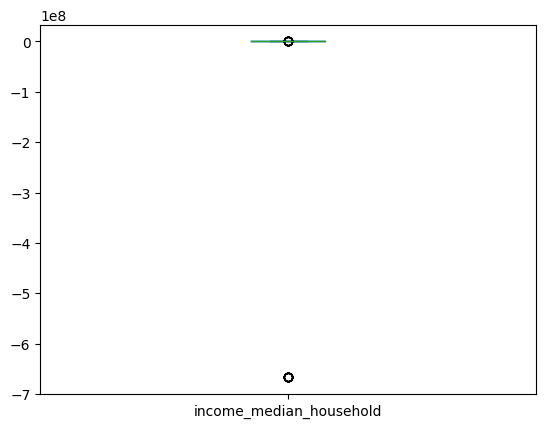

In [156]:
#attempt to plot a box plot of the income data to get a rough idea of how the data varies
#encountering an issue. not exactly sure what is going on
data['income_median_household'].plot(kind='box')

## Remaining Questions

- How are we going to merge locality data across the U.S. Census and AQS API? By ZIP code, for instance? This will be a very important consideration and may cause us to change our research question depending on data availability.
- How are we going to obtain time series data for Census data? One easy, though possibly inefficient, way is to run a `for` loop where we change the year in the Census query url.
- Is ACS5 the best dataset to use? My understanding is that ACS5 gives 5-year estimates of the variables included. We will need to decide if this is what we really want.